In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Custom color palette
colors = {
    'male': '#2E86AB',      # Blue
    'female': '#A23B72',    # Magenta
    'neutral': '#F18F01',   # Orange
    'bias_pos': '#C73E1D',  # Red
    'bias_neg': '#592E83'   # Purple
}


# Load your data
df = pd.read_csv('../data/coco/coco_bias_results.csv')

df.head()

,coco_id,male_similarity,female_similarity,male_prob,female_prob,bias_score,weat_score
0,184613,0.153498,0.145648,0.501962,0.498038,0.007850,0.026241
1,403013,0.110548,0.083080,0.506867,0.493133,0.027468,0.141860
2,562150,0.108235,0.112895,0.498835,0.501165,-0.004660,-0.021074
3,360772,0.121328,0.108018,0.503327,0.496673,0.013309,0.058031
4,340559,0.115504,0.095047,0.505114,0.494886,0.020457,0.097159


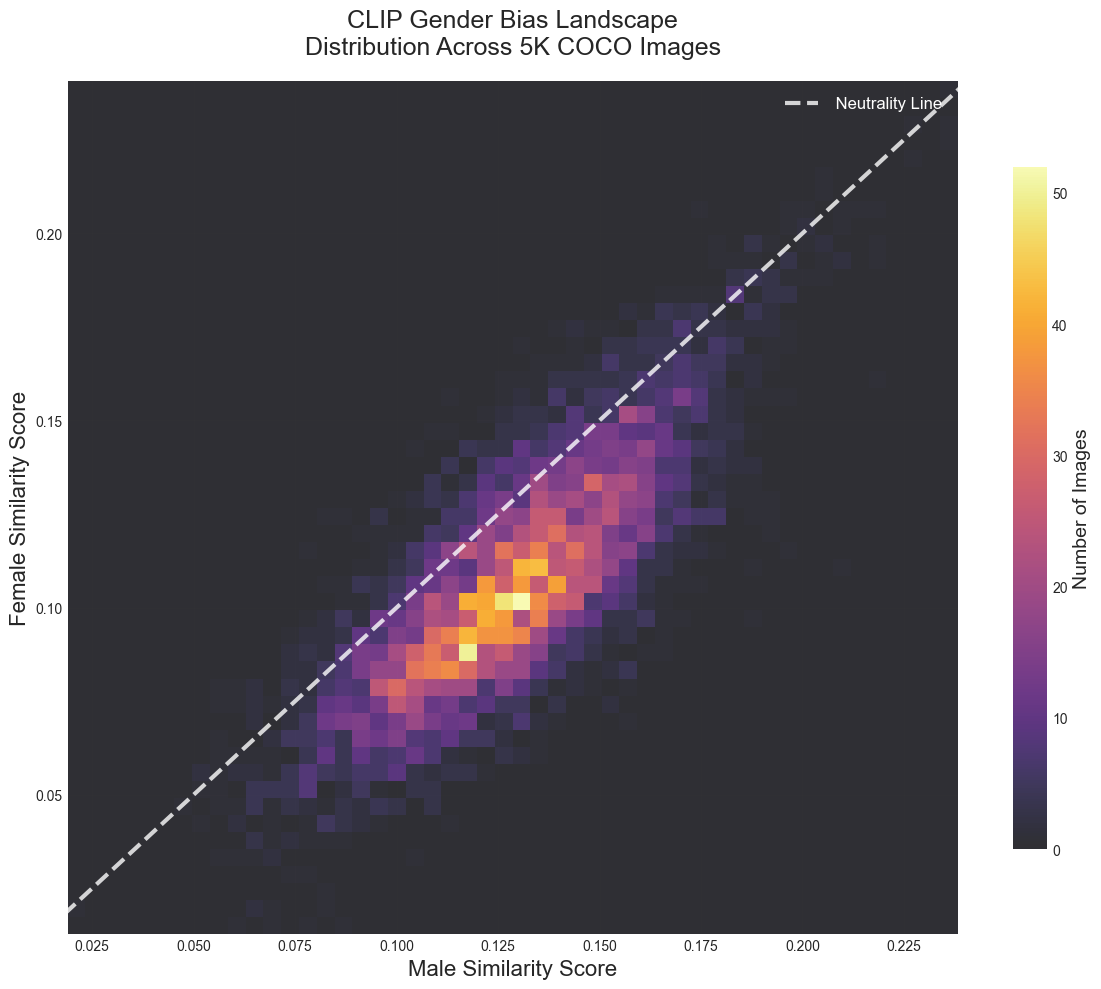

In [14]:
def create_bias_landscape():
    """Create a stunning 2D bias landscape visualization"""
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Create 2D histogram
    h = ax.hist2d(df['male_similarity'], df['female_similarity'], 
                  bins=50, cmap='inferno', alpha=0.8)
    
    # Add diagonal line (perfect neutrality)
    ax.plot([0, 1], [0, 1], 'white', linewidth=3, linestyle='--', alpha=0.8, label=' Neutrality Line')
    
    # Add colorbar
    cbar = plt.colorbar(h[3], ax=ax, shrink=0.8)
    cbar.set_label('Number of Images', fontsize=14)
    
    # Styling
    ax.set_xlabel('Male Similarity Score', fontsize=16)
    ax.set_ylabel('Female Similarity Score', fontsize=16)
    ax.set_title('CLIP Gender Bias Landscape\nDistribution Across 5K COCO Images', 
                fontsize=18, pad=20)
    
    # Add bias regions
    # ax.axhspan(0, 0.5, xmin=0.5, xmax=1, alpha=0.1, color=colors['male'], label='Male Bias Region')
    # ax.axvspan(0.5, 1, ymin=0, ymax=0.5, alpha=0.1, color=colors['female'], label='Female Bias Region')
    
    ax.legend(loc='upper right', fontsize=12, labelcolor='white')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig1 = create_bias_landscape()

#show figure
plt.show()

/Users/kirthikumar/Desktop/vlm-project/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kirthikumar/Desktop/vlm-project/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kirthikumar/Desktop/vlm-project/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kirthikumar/Desktop/vlm-project/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9898 (\N{MEDIUM WHITE CIRCLE}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kirthikumar/Desktop/vlm-project/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  func(*arg

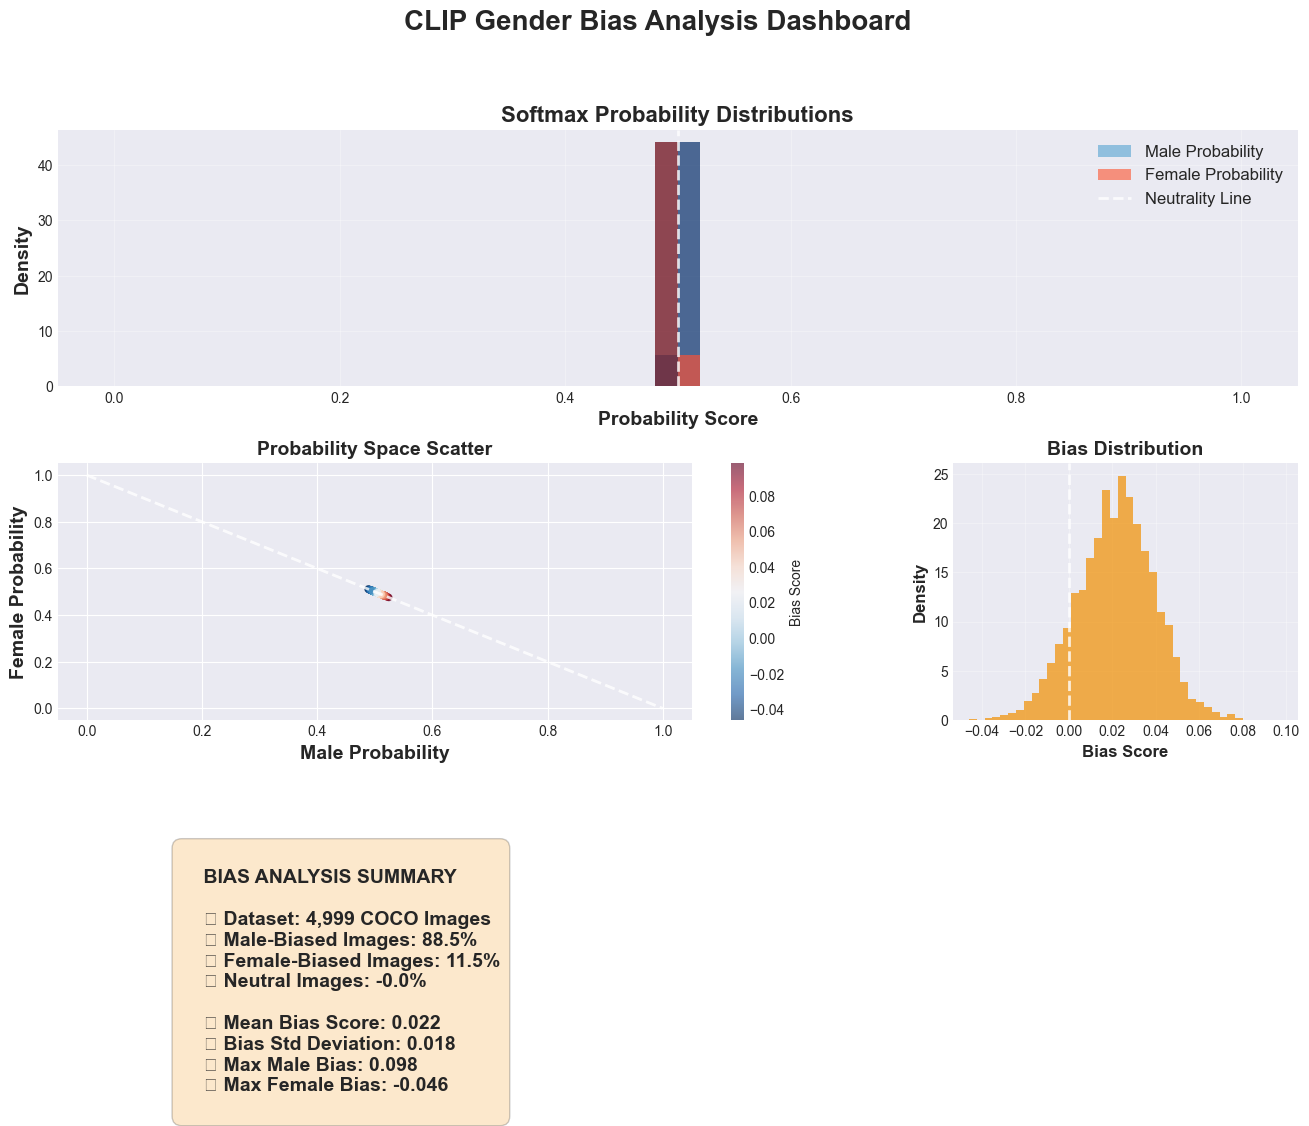

In [15]:
def create_probability_dashboard():
    """Create an elegant probability distribution dashboard"""
    fig = plt.figure(figsize=(16, 12))
    gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    # Main probability distribution
    ax1 = fig.add_subplot(gs[0, :])
    
    # Create beautiful histogram with gradient effect
    bins = np.linspace(0, 1, 51)
    n1, bins1, patches1 = ax1.hist(df['male_prob'], bins=bins, alpha=0.7, 
                                   label='Male Probability', color=colors['male'], density=True)
    n2, bins2, patches2 = ax1.hist(df['female_prob'], bins=bins, alpha=0.7, 
                                   label='Female Probability', color=colors['female'], density=True)
    
    # Add gradient effect to bars
    for i, (p1, p2) in enumerate(zip(patches1, patches2)):
        p1.set_facecolor(plt.cm.Blues(0.5 + 0.5 * n1[i] / max(n1)))
        p2.set_facecolor(plt.cm.Reds(0.5 + 0.5 * n2[i] / max(n2)))
    
    ax1.axvline(0.5, color='white', linewidth=2, linestyle='--', alpha=0.8, label='Neutrality Line')
    ax1.set_xlabel('Probability Score', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=14, fontweight='bold')
    ax1.set_title('Softmax Probability Distributions', fontsize=16, fontweight='bold')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Probability scatter plot
    ax2 = fig.add_subplot(gs[1, :2])
    scatter = ax2.scatter(df['male_prob'], df['female_prob'], 
                         c=df['bias_score'], cmap='RdBu_r', alpha=0.6, s=20)
    ax2.plot([0, 1], [1, 0], 'white', linewidth=2, linestyle='--', alpha=0.8)
    ax2.set_xlabel('Male Probability', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Female Probability', fontsize=14, fontweight='bold')
    ax2.set_title('Probability Space Scatter', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=ax2, label='Bias Score')
    
    # Bias score distribution
    ax3 = fig.add_subplot(gs[1, 2])
    bias_colors = [colors['bias_neg'] if x < 0 else colors['bias_pos'] for x in df['bias_score']]
    ax3.hist(df['bias_score'], bins=40, color=colors['neutral'], alpha=0.7, density=True)
    ax3.axvline(0, color='white', linewidth=2, linestyle='--', alpha=0.8)
    ax3.set_xlabel('Bias Score', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Density', fontsize=12, fontweight='bold')
    ax3.set_title('Bias Distribution', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Summary statistics
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    # Calculate key statistics
    male_bias_pct = (df['bias_score'] > 0).mean() * 100
    female_bias_pct = (df['bias_score'] < 0).mean() * 100
    neutral_pct = 100 - male_bias_pct - female_bias_pct
    
    stats_text = f"""
    BIAS ANALYSIS SUMMARY
    
    📊 Dataset: {len(df):,} COCO Images
    🔵 Male-Biased Images: {male_bias_pct:.1f}%
    🔴 Female-Biased Images: {female_bias_pct:.1f}%
    ⚪ Neutral Images: {neutral_pct:.1f}%
    
    📈 Mean Bias Score: {df['bias_score'].mean():.3f}
    📊 Bias Std Deviation: {df['bias_score'].std():.3f}
    🎯 Max Male Bias: {df['bias_score'].max():.3f}
    🎯 Max Female Bias: {df['bias_score'].min():.3f}
    """
    
    ax4.text(0.1, 0.8, stats_text, fontsize=14, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.5", facecolor=colors['neutral'], alpha=0.2),
             verticalalignment='top')
    
    fig.suptitle('CLIP Gender Bias Analysis Dashboard', fontsize=20, fontweight='bold', y=0.98)
    
    return fig

fig2 = create_probability_dashboard() 

In [ ]:
def create_weat_analysis():
    """Create sophisticated WEAT score analysis"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # WEAT score distribution with beautiful styling
    n, bins, patches = ax1.hist(df['weat_score'], bins=50, alpha=0.8, density=True)
    
    # Color gradient based on bias direction
    for i, (patch, bin_center) in enumerate(zip(patches, (bins[:-1] + bins[1:]) / 2)):
        if bin_center < 0:
            patch.set_facecolor(plt.cm.RdYlBu(0.8))  # Blue for female bias
        else:
            patch.set_facecolor(plt.cm.RdYlBu(0.2))  # Red for male bias
    
    ax1.axvline(0, color='white', linewidth=3, linestyle='--', alpha=0.9, label='Perfect Neutrality')
    ax1.set_xlabel('WEAT Score', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=14, fontweight='bold')
    ax1.set_title('WEAT Score Distribution', fontsize=16, fontweight='bold')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # WEAT vs Bias Score correlation
    ax2.scatter(df['bias_score'], df['weat_score'], alpha=0.5, s=20, 
               c=df['male_prob'], cmap='viridis')
    ax2.set_xlabel('Bias Score', fontsize=14, fontweight='bold')
    ax2.set_ylabel('WEAT Score', fontsize=14, fontweight='bold')
    ax2.set_title('WEAT vs Bias Score Correlation', fontsize=16, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Box plot comparison
    data_for_box = [
        df[df['weat_score'] < -0.1]['weat_score'],  # Strong female bias
        df[(df['weat_score'] >= -0.1) & (df['weat_score'] <= 0.1)]['weat_score'],  # Neutral
        df[df['weat_score'] > 0.1]['weat_score']   # Strong male bias
    ]
    
    box_plot = ax3.boxplot(data_for_box, labels=['Female\nBiased', 'Neutral', 'Male\nBiased'],
                          patch_artist=True)
    
    # Color the boxes
    colors_box = [colors['female'], colors['neutral'], colors['male']]
    for patch, color in zip(box_plot['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax3.set_ylabel('WEAT Score', fontsize=14, fontweight='bold')
    ax3.set_title('WEAT Score by Bias Category', fontsize=16, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Cumulative distribution
    sorted_weat = np.sort(df['weat_score'])
    cumulative = np.arange(1, len(sorted_weat) + 1) / len(sorted_weat)
    ax4.plot(sorted_weat, cumulative, linewidth=3, color=colors['neutral'])
    ax4.axvline(0, color='red', linewidth=2, linestyle='--', alpha=0.8, label='Neutrality')
    ax4.fill_between(sorted_weat, cumulative, alpha=0.3, color=colors['neutral'])
    ax4.set_xlabel('WEAT Score', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Cumulative Probability', fontsize=14, fontweight='bold')
    ax4.set_title('WEAT Score CDF', fontsize=16, fontweight='bold')
    ax4.legend(fontsize=12)
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle('Word Embedding Association Test (WEAT) Analysis', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    
    return fig

# show figure
plt.show()

fig3 = create_weat_analysis()
plt.show()

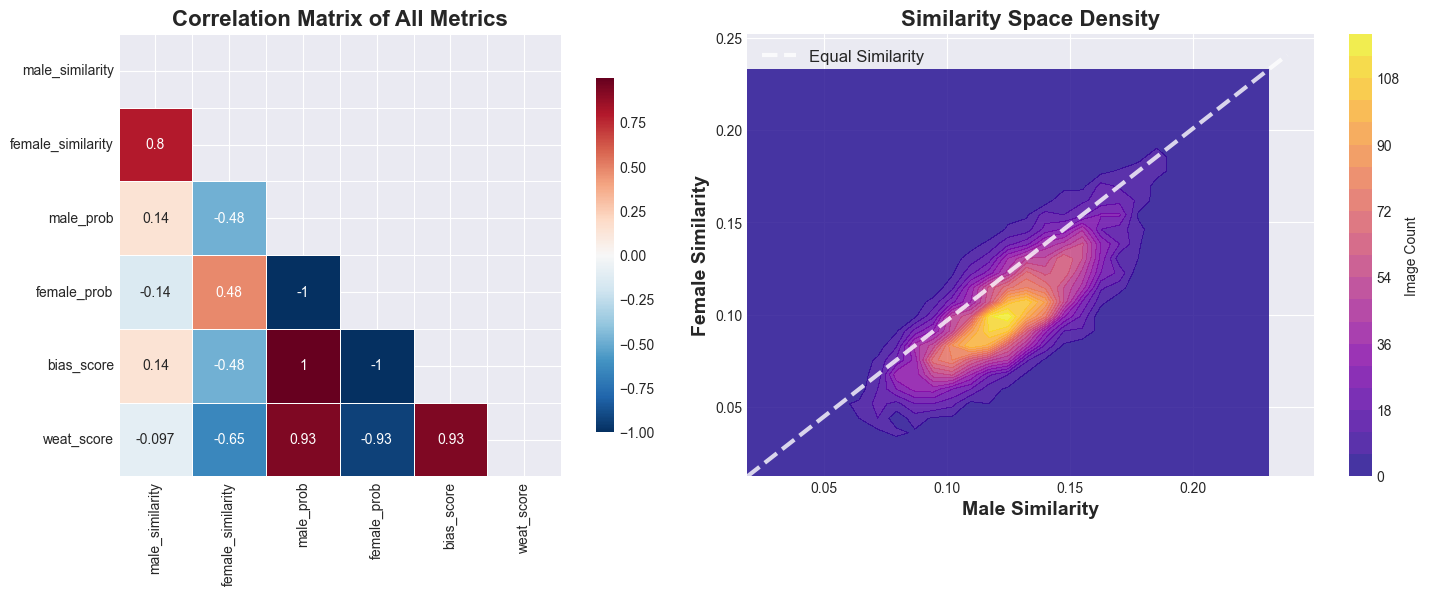

In [3]:
def create_similarity_heatmap():
    """Create a stunning similarity correlation heatmap"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Correlation matrix
    corr_data = df[['male_similarity', 'female_similarity', 'male_prob', 
                   'female_prob', 'bias_score', 'weat_score']].corr()
    
    # Beautiful heatmap
    mask = np.triu(np.ones_like(corr_data, dtype=bool))
    sns.heatmap(corr_data, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax1)
    ax1.set_title('Correlation Matrix of All Metrics', fontsize=16, fontweight='bold')
    
    # Similarity space visualization
    # Create bins for 2D histogram
    x_bins = np.linspace(df['male_similarity'].min(), df['male_similarity'].max(), 30)
    y_bins = np.linspace(df['female_similarity'].min(), df['female_similarity'].max(), 30)
    
    # Create 2D histogram
    hist, x_edges, y_edges = np.histogram2d(df['male_similarity'], df['female_similarity'], 
                                           bins=[x_bins, y_bins])
    
    # Create beautiful contour plot
    X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])
    contour = ax2.contourf(X, Y, hist.T, levels=20, cmap='plasma', alpha=0.8)
    
    # Add diagonal line
    ax2.plot([df['male_similarity'].min(), df['male_similarity'].max()], 
            [df['female_similarity'].min(), df['female_similarity'].max()], 
            'white', linewidth=3, linestyle='--', alpha=0.8, label='Equal Similarity')
    
    ax2.set_xlabel('Male Similarity', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Female Similarity', fontsize=14, fontweight='bold')
    ax2.set_title('Similarity Space Density', fontsize=16, fontweight='bold')
    ax2.legend(fontsize=12)
    
    plt.colorbar(contour, ax=ax2, label='Image Count')
    plt.tight_layout()
    
    return fig

fig4 = create_similarity_heatmap()
# Show the similarity heatmap
plt.show()

In [ ]:
 # Save plots
    # fig1.savefig('bias_landscape.png', dpi=300, bbox_inches='tight', facecolor='white')
    # fig2.savefig('probability_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
    # fig3.savefig('weat_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    # fig4.savefig('similarity_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')